1.

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.optimize as opt

In [42]:
data = np.loadtxt('incomes.txt')
max_i = data.max()
min_i = data.min()

a)

<IPython.core.display.Javascript object>


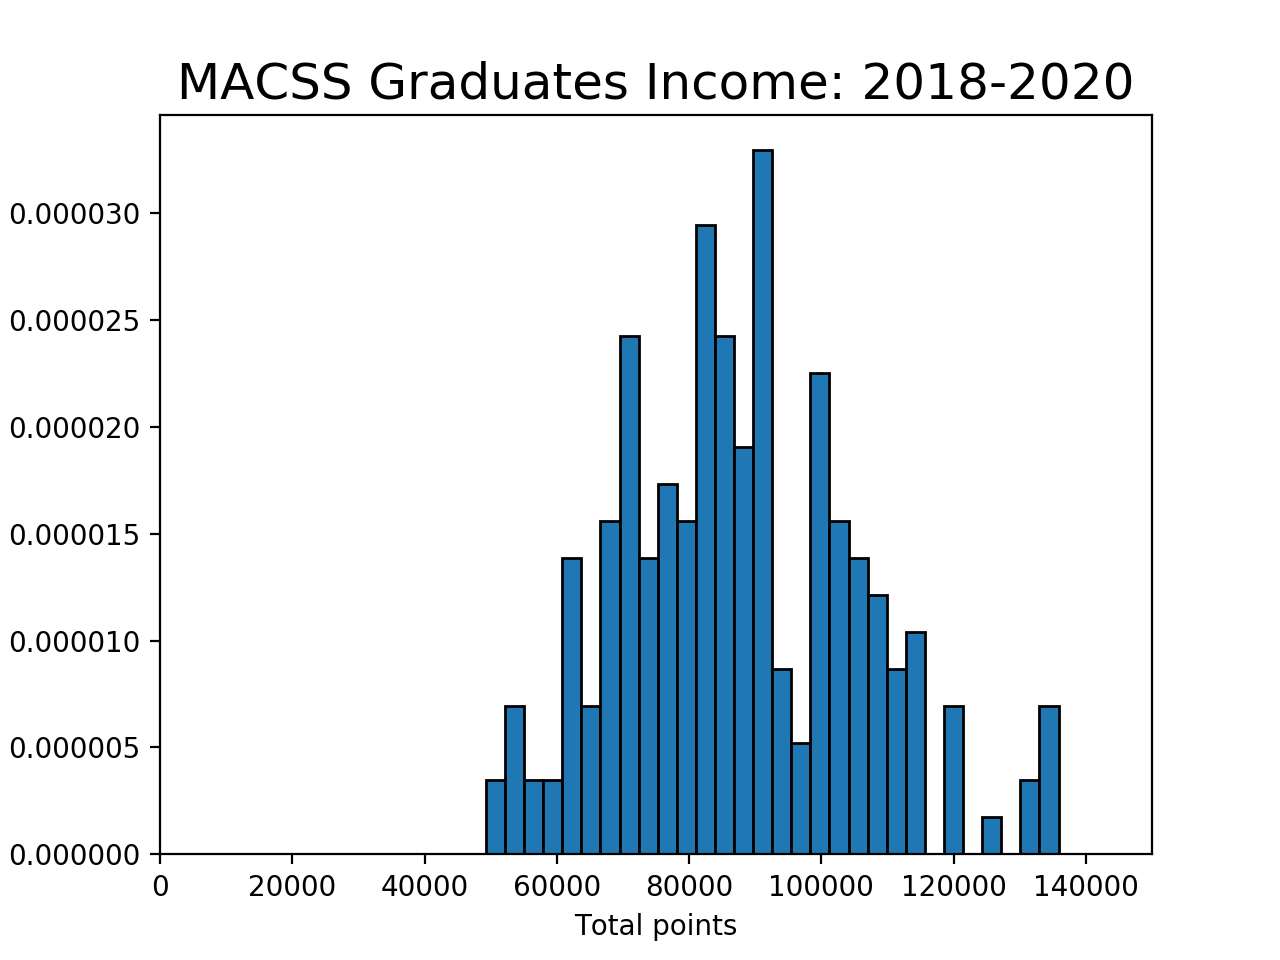

(0, 150000)

In [126]:
%matplotlib notebook

num_bins = 30
count, bins, ignored = plt.hist(data, num_bins,
                                edgecolor='k', density=True)
plt.title('MACSS Graduates Income: 2018-2020', fontsize=18)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of income')
plt.xlim([0, 150000]) 


b)

In [181]:
def trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub):
    if cut_ub == None and cut_lb == None:
        prob_notcut = 1.0
    elif cut_ub == None and cut_lb != None:
        prob_notcut = 1.0 - sts.lognorm.cdf(cut_lb, sigma, loc=0, scale=mu)
    elif cut_ub != None and cut_lb == None:
        prob_notcut = sts.lognorm.cdf(cut_ub, sigma, loc=0, scale=mu)
    elif cut_ub != None and cut_lb != None:
        prob_notcut = (sts.lognorm.cdf(cut_ub, sigma, loc=0, scale=mu) -
                       sts.lognorm.cdf(cut_lb, sigma, loc=0, scale=mu))
        #print(prob_notcut)
            
    pdf_vals    = ((1/(xvals * sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - (np.absolute(np.log(xvals) - mu))**2 / (2 * sigma**2))) 
                   / prob_notcut)
    return pdf_vals            

<IPython.core.display.Javascript object>


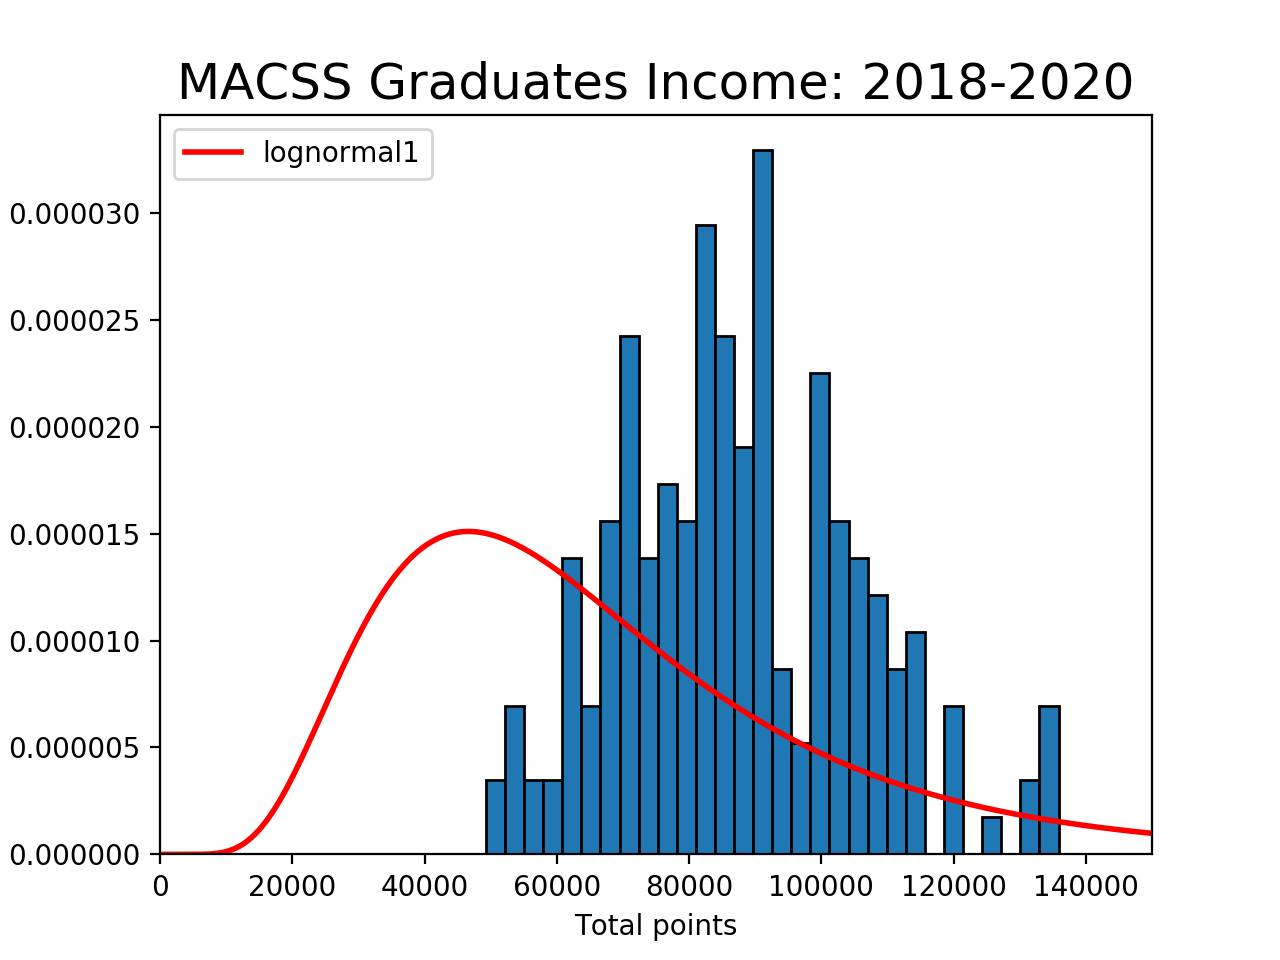

c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


In [127]:
num_bins = 30
count, bins, ignored = plt.hist(data, num_bins,
                                edgecolor='k', density=True)
plt.title('MACSS Graduates Income: 2018-2020', fontsize=18)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of income')
plt.xlim([0, 150000]) 

dist_pts = np.linspace(0, 150000, 500)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_1, sig_1, 0, 15000),
         linewidth=2, color='r', label='lognormal1')
plt.legend(loc='upper left')

In [72]:
def loglik_trunclognorm(xvals, mu, sigma, cut_lb, cut_ub):

    pdf_vals = trunc_lognorm_pdf(xvals, mu, sigma, cut_lb, cut_ub)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    
    return log_lik_val
print('Log-likelihood 1: ', loglik_trunclognorm(data, mu_1, sig_1, 0, 150000))

Log-likelihood 1:  -2385.856997808558


c)

In [155]:
def crit(params, *args):
    mu, sigma = params
    xvals, cut_lb, cut_ub = args
    log_lik_val = log_lik_trunclognorm(xvals, mu, sigma, cut_lb, cut_ub)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val

mu_init = 10
sig_init = 0.1
params_init = np.array([mu_init, sig_init])
mle_args = (data, 0, 150000)
bnds = ((0, None), (1e-10, None))
results_uncstr = opt.minimize(crit, params_init, method='TNC', bounds=bnds, args=(mle_args))
mu_MLE, sig_MLE = results_uncstr.x
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)

mu_MLE= 11.359022992328397  sig_MLE= 0.20817732884692197


In [156]:
results_uncstr

     fun: 2241.7193013573587
     jac: array([-4.54747351e-05,  0.00000000e+00])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 28
     nit: 10
  status: 1
 success: True
       x: array([11.35902299,  0.20817733])

<IPython.core.display.Javascript object>


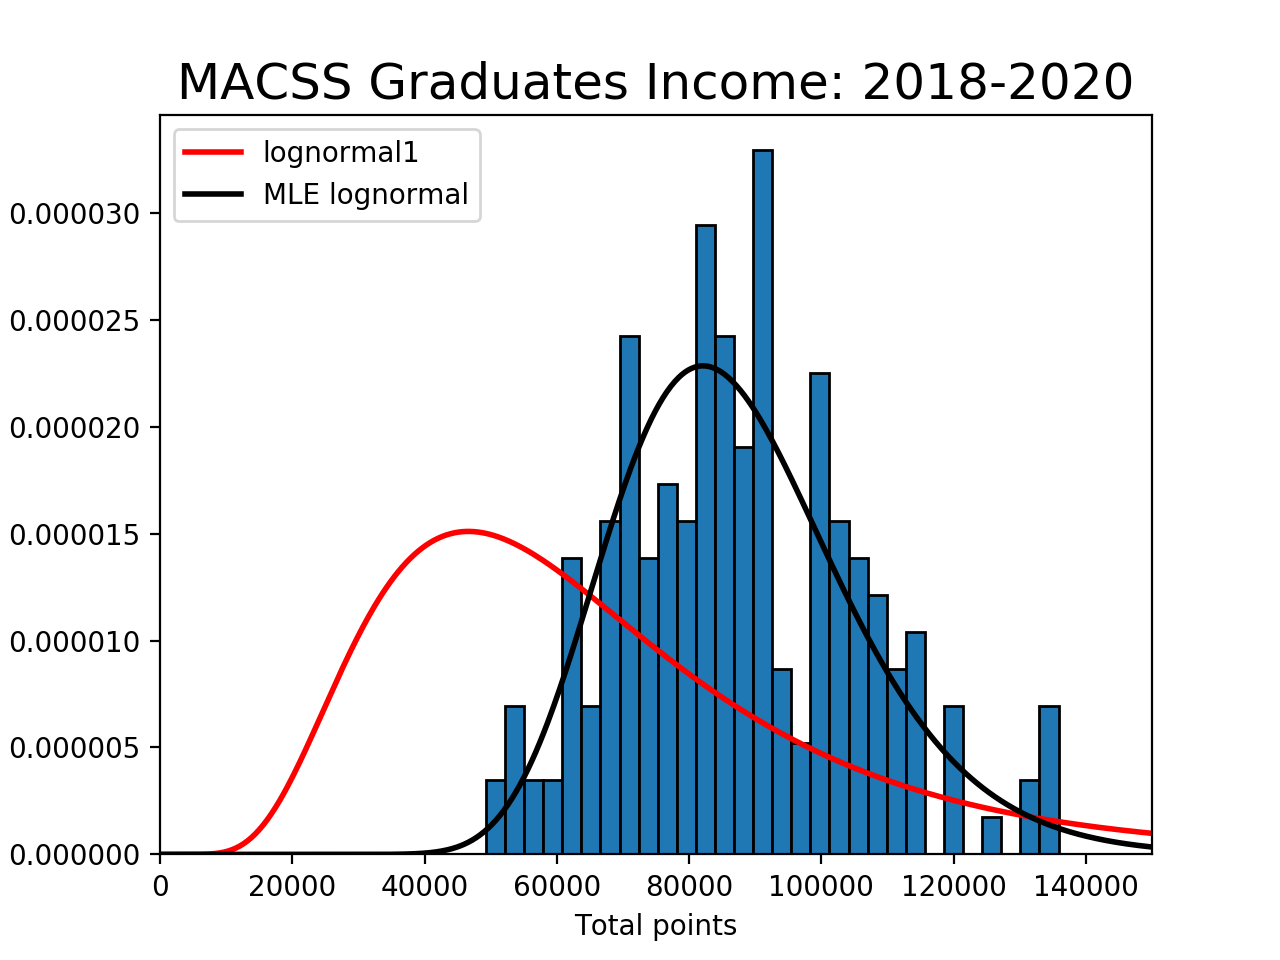

c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


In [157]:
num_bins = 30
count, bins, ignored = plt.hist(data, num_bins,
                                edgecolor='k', density=True)
plt.title('MACSS Graduates Income: 2018-2020', fontsize=18)
plt.xlabel(r'Total points')
plt.ylabel(r'Percent of income')
plt.xlim([0, 150000]) 

dist_pts = np.linspace(0, 150000, 500)
mu_1 = 11
sig_1 = 0.5
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_1, sig_1, 0, 15000),
         linewidth=2, color='r', label='lognormal1')
plt.legend(loc='upper left')

# Plot the MLE estimated distribution
plt.plot(dist_pts, trunc_lognorm_pdf(dist_pts, mu_MLE, sig_MLE, 0, 15000),
         linewidth=2, color='k', label='MLE lognormal')
plt.legend(loc='upper left')


In [158]:
print('Log-likelihood 1: ', log_lik_trunclognorm(data, mu_1, sig_1, 0, 150000))
print('MLE log-likelihood 3: ', log_lik_trunclognorm(data, mu_MLE, sig_MLE, 0, 150000))

Log-likelihood 1:  -2385.856997808558
MLE log-likelihood 3:  -2241.7193013573587


d)

In [159]:
n_uncstr = opt.minimize(crit, params_init, method='L-BFGS-B', bounds=((0, None), (1e-10, None)), args=(mle_args))
vcv_mle = n_uncstr.hess_inv.todense()
print('VCV(MLE) = ', vcv_mle)
n_uncstr

VCV(MLE) =  [[0.03787814 0.16973735]
 [0.16973735 0.76401203]]


c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


      fun: 2403.2585411013233
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([260.59578886, 122.55941328])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 48
      nit: 8
   status: 0
  success: True
        x: array([11.7576457 ,  0.55311106])

Note: as of above I used the TNC method, which I found to be the one producing highest log-likelihood of the there methods that support bounds. However, the TNC method does not output an inverse hessian, and thus I use L-BFGS-B here for the calculation. Note thought that this method does not produce as good of an optimization result as the TNC method despite same setup.

d)

In [176]:
mu_new, sig_new = (np.log(data.mean()) - np.log((data.std() / data.mean()) ** 2 + 1)), np.sqrt(np.log((data.std() / data.mean()) ** 2 + 1))
print(mu_new, sig_new)
print(mu_MLE, sig_MLE)
log_lik_h0 = log_lik_trunclognorm(data, mu_new, sig_new, 0, 150000)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik_trunclognorm(data, mu_MLE, sig_MLE, 0, 150000)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

11.338883068946608 0.20378135072571749
11.359022992328397 0.20817732884692197
hypothesis value log likelihood -2242.788471786417
MLE log likelihood -2241.7193013573587
likelihood ratio value 2.1383408581168624
chi squared of H0 with 2 degrees of freedom p-value =  0.3432931853772756


The P-value shows no evidence against the null hypothesis that the dataset comes from the MLE distribution.

e)

In [190]:
print('Prob{earn more than $100000} = ', (1 - sts.lognorm.cdf(np.log(100000), sig_MLE, loc=0, scale=mu_MLE)))
print('Prob{earn less than $75000} = ', sts.lognorm.cdf(np.log(75000), sig_MLE, loc=0, scale=mu_MLE))

Prob{earn more than $100000} =  0.47422769849982227
Prob{earn less than $75000} =  0.4773086027115783


2.

In [195]:
import pandas as pd

In [205]:
df = pd.read_csv('sick.txt', sep=",", header='infer')
df

,sick,age,children,avgtemp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90
...,...,...,...,...
195,0.53,30.56,0.74,41.76
196,0.86,33.97,1.40,39.10
197,1.39,44.00,2.45,40.95
198,0.72,22.30,1.03,23.14


In [223]:
y, x1, x2, x3 = df['sick'], df['age'], df['children'], df['avgtemp_winter']

In [246]:
def log_lik(y, x1, x2, x3, beta_0, beta_1, beta_2, beta_3, sigma):
    epsilon = y - beta_0 - beta_1 * x1 - beta_2 * x2 - beta_3 * x3
    pdf_vals = sts.norm.pdf(epsilon, loc=0.0, scale=sigma)
    log_lik_func = np.log(pdf_vals).sum()
    return log_lik_func

def crit_lr(params, *args):
    beta_0, beta_1, beta_2, beta_3, sigma = params
    y, x1, x2, x3 = args
    neg_log_lik = -log_lik(y, x1, x2, x3, beta_0,
                           beta_1, beta_2, beta_3, sigma)
    
    return neg_log_lik
bnd = ((None, None), (-1, 1), (-1, 1), (-1, 1), (1e-10, None))
b0_init = 0
b1_init = 0
b2_init = 0
b3_init = 0
sigma_init = 1
params_init = np.array([b0_init, b1_init, b2_init, b3_init, sigma_init])
args_lr = (y, x1, x2, x3)
results = opt.minimize(crit_lr, params_init, method='L-BFGS-B', bounds=bnd, args=(args_lr))
bhat_0, bhat_1, bhat_2, bhat_3, sighat = results.x

c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
c:\users\pahadrianus\appdata\local\programs\python\python36\lib\site-packages\scipy\optimize\optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


In [247]:
results

      fun: 80.48525483147341
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([  -45.94358103, -1670.46734987,  -317.76563532,  1537.16612346,
         142.02047822])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 126
      nit: 18
   status: 0
  success: True
        x: array([-0.49656575,  0.02255602,  0.10547495,  0.00840807,  0.4200542 ])

Can see that the maximized log-likelihood is 80.485.

In [248]:
vcv_mle = results.hess_inv.todense()
print('VCV(MLE) = ', vcv_mle)

VCV(MLE) =  [[ 9.98780316 -0.14690397 -0.05304647  0.2305466   0.44915187]
 [-0.14690397  0.01406161 -0.10907169 -0.01425514  0.01054161]
 [-0.05304647 -0.10907169  1.06041109  0.08694647 -0.20054054]
 [ 0.2305466  -0.01425514  0.08694647  0.01953397 -0.02034259]
 [ 0.44915187  0.01054161 -0.20054054 -0.02034259  0.75452338]]


In [250]:
print('estimated parameters: ', bhat_0, bhat_1, bhat_2, bhat_3, sighat)

estimated parameters:  -0.4965657469530529 0.02255601795400823 0.10547495361847838 0.008408074694177137 0.42005420477882355


b)

In [252]:
btil_0, btil_1, btil_2, btil_3, sigtil =(1, 0, 0, 0, 0.1)
print(btil_0, btil_1, btil_2, btil_3, sigtil)
print(bhat_0, bhat_1, bhat_2, bhat_3, sighat)
log_lik_h0 = log_lik(y, x1, x2, x3, btil_0, btil_1, btil_2, btil_3, sigtil)
print('hypothesis value log likelihood', log_lik_h0)
log_lik_mle = log_lik(y, x1, x2, x3, bhat_0, bhat_1, bhat_2, bhat_3, sighat)
print('MLE log likelihood', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('likelihood ratio value', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

1 0 0 0 0.1
-0.4965657469530529 0.02255601795400823 0.10547495361847838 0.008408074694177137 0.42005420477882355
hypothesis value log likelihood -2253.700688042125
MLE log likelihood -80.48525483147341
likelihood ratio value 4346.430866421303
chi squared of H0 with 2 degrees of freedom p-value =  0.0


We can clearly see that the there is statistical significant evidence against the joint hypothesiss that age, number of children and average winter temperature all have no effect on the number of sick days. The p-value is so small as the result of the very low likelihood generated by these absurd hypothetical parameters. 